<a href="https://colab.research.google.com/github/gustavosilvestre97/ML_Classification/blob/main/Assigment18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
from pathlib import Path
import progressbar as pb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pandas_profiling as pp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score
from sklearn.metrics import accuracy_score

In [15]:
%env KAGGLE_USERNAME=gustavosilvestre
%env KAGGLE_KEY=e3f1ea997c2a46e4ef8991980a670dfb

!kaggle datasets download -d ronitf/heart-disease-uci --unzip -p /content/heart-disease
!ls /content/heart-disease

env: KAGGLE_USERNAME=gustavosilvestre
env: KAGGLE_KEY=e3f1ea997c2a46e4ef8991980a670dfb
  0% 0.00/3.40k [00:00<?, ?B/s]
100% 3.40k/3.40k [00:00<00:00, 5.78MB/s]
heart.csv


In [44]:
df = pd.read_csv("/content/heart-disease/heart.csv")

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
pca = PCA(n_components=2,svd_solver='full')
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [20]:
test1 = pca.explained_variance_ratio_
test2 = pca.singular_values_

Relação de pessoas com doenças cardíacas.

In [23]:
df_target = df.groupby('target').size()
df_target

target
0    138
1    165
dtype: int64

Com relação somente aos pacientes homens temos 44,9% com problemas cardíaco. Já em relação somente a mulheres, temos 75% das pacientes com problemas cardíacos. Mas em relação a amostra total os homens com doenças cardíacas representão 30,7% e as mulheres, 23,8%

In [24]:
df_sex = df.groupby(['sex','target']).size()
df_sex

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

Em relação a pacientes com mais de 40 ano, a porcentagem de problemas cardíaco aumenta, como vemos no gráfico abaixo:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


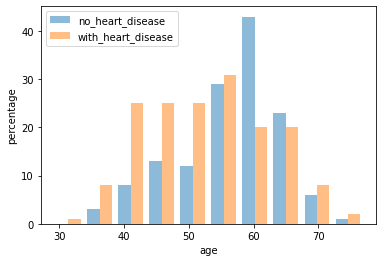

In [39]:
plt.hist([df[df.target==0].age, df[df.target==1].age], bins = 10, alpha = 0.5, label = ["no_heart_disease","with_heart_disease"])
plt.xlabel("age")
plt.ylabel("percentage")
plt.legend()
plt.show()

Vemos também que a maior parte dos pacientes com problemas cardíacos tem colesterol acima do indicado, que seria 200 mg/dl

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


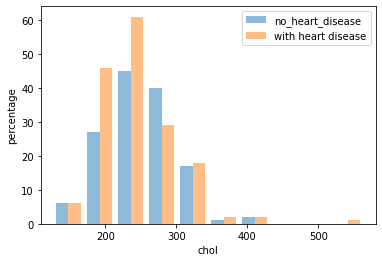

In [40]:
plt.hist([df[df.target==0].chol, df[df.target==1].chol], bins = 10, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("chol")
plt.ylabel("percentage")
plt.legend()
plt.show()

Agora verificando a pressão arterial vemos que 50% dos pacientes tem a pressão elevada tem problemas cardíaco ou não.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


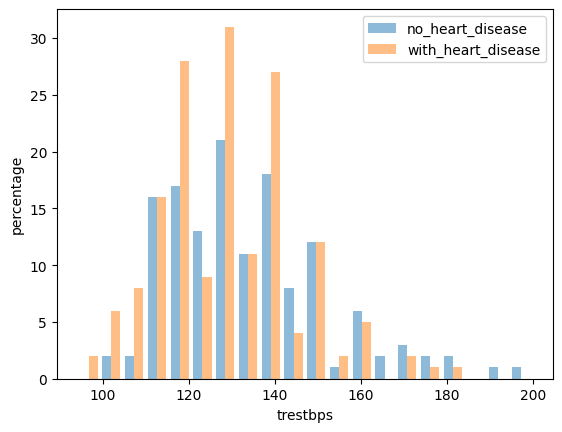

In [79]:
plt.hist([df[df.target==0].trestbps, df[df.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with_heart_disease"])
plt.xlabel("trestbps")
plt.ylabel("percentage")
plt.legend()
plt.show()

A frequência cardíaca máxima está negativamente relacionada à idade. Vamos ver a distribuição.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


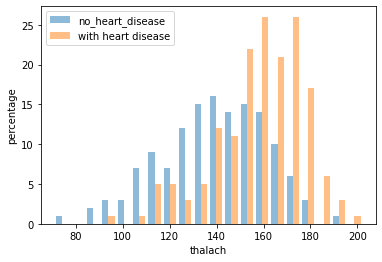

In [28]:
plt.hist([df[df.target==0].thalach, df[df.target==1].thalach], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("thalach")
plt.ylabel("percentage")
plt.legend()
plt.show()

Agora um grafico mostranto a correlação

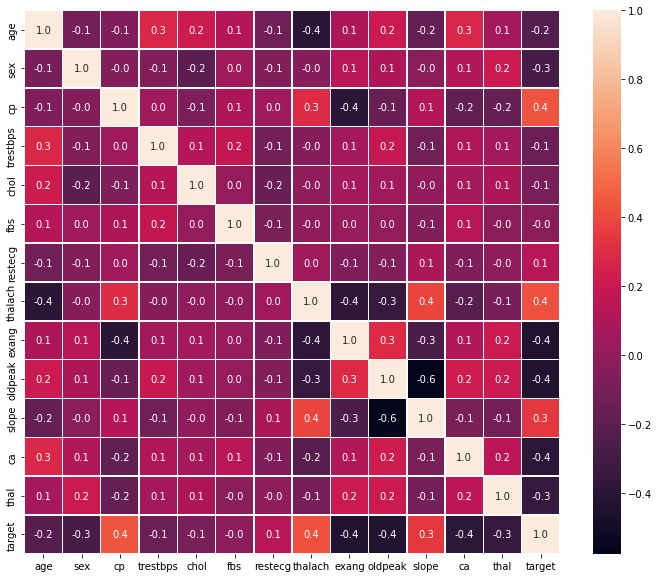

In [21]:
plt.figure(figsize=(12, 10))
plot = sn.heatmap(df.corr(), annot = True, fmt=".1f", linewidths=.5)
plot

In [29]:
df_1 = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]
df_1.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


Verificando se temos outliers, vemos que todos tem 

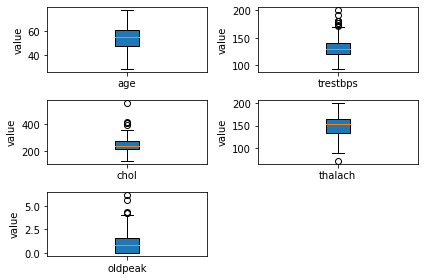

In [30]:
for item in df_1.columns:
    plt.subplot(3,2,list(df_1.columns).index(item)+1)
    plt.boxplot(df_1[item], patch_artist=True, labels = [item])
    plt.ylabel("value")
plt.tight_layout()
plt.show()


Existem outliers em cada característica, exceto idade. Definimos os outliers que não estão na faixa de 3 sigma. Em seguida, remova os outliers.

In [31]:
infor = df.describe()

df2 = df[df.trestbps < infor.loc["mean", "trestbps"] + 3 * infor.loc["std", "trestbps"]]
df3 = df2[df.chol < infor.loc["mean", "chol"] + 3 * infor.loc["std", "chol"]]
df4 = df3[df.thalach > infor.loc["mean", "thalach"] - 3 * infor.loc["std", "thalach"]]
df_new = df4[df.oldpeak < infor.loc["mean", "oldpeak"] + 3 * infor.loc["std", "oldpeak"]]
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
df_new.cp = df_new.cp.map({0:"asymptomatic", 1: "typical angina", 2:"atypical angina", 3:"non-anginal pain"})
df_new.sex = df_new.sex.map({0:"Female", 1:"Male"}) 
df_new.exang = df_new.exang.map({0:"exercise did not induce angina", 1:"exercise induced angina"})
df_new.slope = df_new.slope.map({1:"upsloping", 2:"flat", 3:"downsloping"})
df_new.thal = df_new.thal.map({1:"normal",2:"fixed defect", 3:"reversable defect"})
df_new = pd.get_dummies(df_new, drop_first = True)
df_new.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,age,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,target,sex_Male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,exang_exercise induced angina,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,1,0,150,2.3,0,1,1,0,1,0,0,0,1,0
1,37,130,250,0,1,187,3.5,0,1,1,1,0,0,0,0,0,0
2,41,130,204,0,0,172,1.4,0,1,0,0,0,1,0,0,0,0
3,56,120,236,0,1,178,0.8,0,1,1,0,0,1,0,0,0,0
4,57,120,354,0,1,163,0.6,0,1,0,0,0,0,1,0,0,0


In [81]:
X = df_new.drop("target", 1).values
y = df_new["target"].astype("int").values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=10)


In [37]:
model = XGBClassifier()
param = dict(model_max_depth=[3,5,7], model_learning_rate=[0.001,0.01, 0.1], model_n_estimators=[100,500])

cv = GridSearchCV(model, param_grid=param, cv=10, iid = True)
cv

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid=True, n_jobs=None,
             param_grid={'model_learning_rate': [0.001, 0.01, 0.1],
                         'model_max_depth': [3, 5, 7],
                         'model_n_estimators': [100, 500]},
 

In [82]:
cv.fit(X_train, y_train)
test_pred = cv.predict(X_test)
cv.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, model_learning_rate=0.001,
              model_max_depth=3, model_n_estimators=100, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [85]:
max_depth_of_model = cv.best_estimator_.max_depth
best_learning_rate = cv.best_estimator_.learning_rate
best_estimator = cv.best_estimator_.n_estimators
best_reg_lambda = cv.best_estimator_.reg_lambda

model = XGBClassifier(max_depth=max_depth_of_model, learning_rate=best_learning_rate, n_estimators= best_estimator,n_jobs=1,)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy_score(yhat,y_test)

0.8243243243243243

In [86]:
importances = model.feature_importances_
importances

array([0.03453032, 0.03534192, 0.02708208, 0.02303579, 0.04639031,
       0.04409802, 0.08606343, 0.13433667, 0.04125298, 0.08961171,
       0.03705766, 0.07323464, 0.10305628, 0.08596155, 0.        ,
       0.13894667], dtype=float32)